In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Считываем данные

In [4]:
df = pd.read_csv('./data/cars_moldova_fixed.csv', delimiter = ',')

df

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,Middle mileage,Rare_Cheap
1,1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,Middle mileage,Rare_Expensive
2,2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,Middle mileage,Average rarity
3,3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,Middle mileage,Average rarity
4,4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,Middle mileage,Average rarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,Middle mileage,Average rarity
32028,32028,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,Middle mileage,Rare_Cheap
32029,32029,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,Middle mileage,Average rarity
32030,32030,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,High mileage,Rare_Cheap


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32032 entries, 0 to 32031
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32032 non-null  int64  
 1   Make                  32032 non-null  object 
 2   Model                 32032 non-null  object 
 3   Year                  32032 non-null  int64  
 4   Style                 32032 non-null  object 
 5   Distance              32032 non-null  float64
 6   Engine_capacity(cm3)  32032 non-null  float64
 7   Fuel_type             32032 non-null  object 
 8   Transmission          32032 non-null  object 
 9   Price(euro)           32032 non-null  float64
 10  Age                   32032 non-null  int64  
 11  km_year               32032 non-null  float64
 12  Distance_category     32032 non-null  object 
 13  Rarity_Price          32032 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 3.4+ MB


In [6]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

# Линейная регрессия

## Разделяем на тренировочный и тестовый датасеты. Используем числовые столбцы.

In [7]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32032 entries, 0 to 32031
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32032 non-null  int64  
 1   Distance              32032 non-null  float64
 2   Engine_capacity(cm3)  32032 non-null  float64
 3   Price(euro)           32032 non-null  float64
 4   km_year               32032 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


,0,1,2,3
22417,0.760331,0.299930,0.576617,0.198397
22418,0.942149,0.164488,0.328358,0.410251
22419,0.710744,0.249925,0.303483,0.137163
22420,0.884298,0.293929,0.351741,0.390782
22421,0.876033,0.329933,0.318657,0.411323


## Функция потерь и расчета

In [8]:
def forward(weights, inputs):
    return inputs.dot(weights.T)

def loss_func(predicts, labels):
        return np.square(predicts - labels)

In [9]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[ 1.49406326 -0.10911799  0.86874464 -0.36167112]
1.7340129857948758 7750.0 7748.265987014205


In [11]:
# функция для расчета градиента ошибки
def grad_loss(predicts, labels, inputs):
    return 2*(predicts - labels)*inputs/inputs.size

In [12]:
weights = np.random.randn(X.shape[1])
yhat = forward(weights, X_train[0])
print(weights)
grad = grad_loss(yhat, y[0], X[0])
print(grad)

[ 0.96668979  1.4194911  -1.04034647  0.73562776]
[-7.79189504e+06 -7.55554218e+08 -6.97434663e+06 -6.86867471e+07]


## Функция обновления весов

In [13]:
def update_weights(grad, weights, lerning_rate):
    return weights - lerning_rate*grad

In [14]:
lerning_rate = 0.01
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[  77919.91709427 7555543.60192406   69742.42595291  686868.20675803]


## Функция инициализации весов

In [15]:
def weights_init(weights, random_state=42):
    if np.ndim(weights)<1:
        weights = np.zeros(weights)

    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

In [16]:
weights = weights_init(X_train.shape[1], random_state=42)
weights

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493])

In [17]:
def fit(X, y, weights, lr,  epochs=30):

    cost = np.zeros(epochs)
    for i in range(epochs):
        # задание весов
        grad = np.zeros(weights.shape)
        #значение функции потерь
        loss = 0

        for m in range(X.shape[0]):
            # расчет целевой переменной
            yhat  = forward(weights, X[m,:])
            # градиент
            grad += grad_loss(yhat,  y[m], X[m,:])
            # фунция потерь
            loss += loss_func(yhat,  y[m])
        # обновление весовых параметров
        weights = update_weights(grad/X.shape[0],weights, lr)
        # текущая функция потрерь
        cost[i] = loss/X.shape[0]

    return weights, cost

## Тестовое обучение

In [18]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc='none' );
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(FontSize = 25)

    plt.yticks(FontSize = 25);

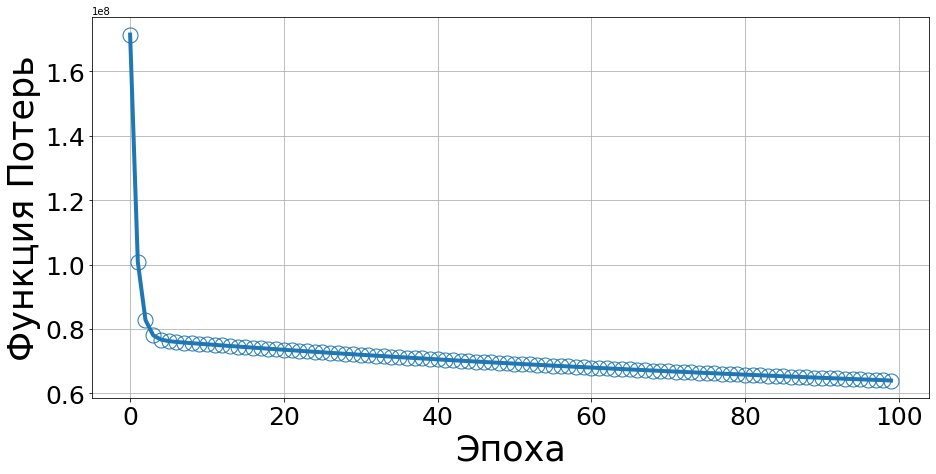

In [19]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit(X_train, y_train, weights, lr=0.9,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost);

## Функция предсказаний

In [ ]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])

    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)

    return yhat

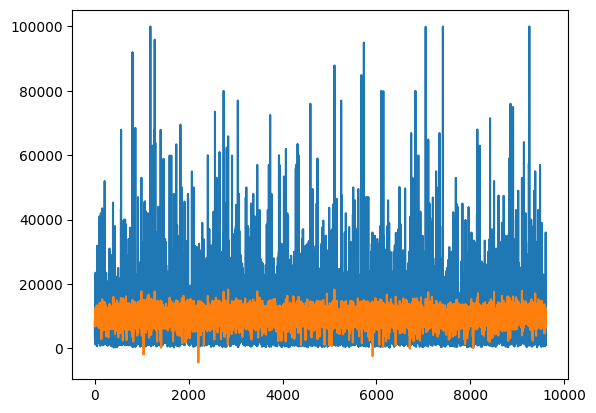

In [ ]:
yhat = predict(weights, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

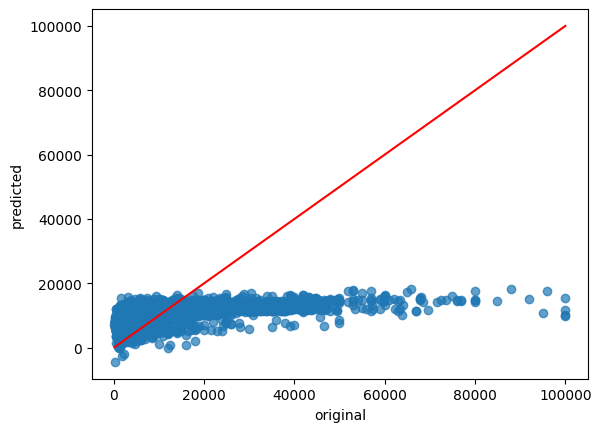

In [ ]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

## Оценка регрессии

### Среднеквадратичная ошибка

In [ ]:
def mean_square_error(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return np.mean(np.sum(np.square(labels-predicts)))

In [ ]:
mean_square_error(weights, X_test, y_test)

629220232674.9485

### Средняя абсолютная ошибка

In [ ]:
def mean_absolute_error(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return np.mean(np.sum(np.abs(labels-predicts)))

In [ ]:
mean_absolute_error(weights, X_test, y_test)

49527169.54012337

### Коэффицент детерминации

In [ ]:
def r2_score(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return 1-np.sum(np.square(labels-predicts))/np.sum(np.square(labels-np.mean(labels)))

In [ ]:
r2_score(weights, X_test, y_test)

0.24369541300956554

In [ ]:
BATCH_SIZE = 5000

def fit_SGD(X, y, weights, lr,  epochs=30, batch_size = BATCH_SIZE, random_state = 42):

    np.random.seed(random_state)

    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        idx_batch = np.random.randint(0,X.shape[0],batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        y_batch   = np.take(y, idx_batch)


        for m in range(batch_size):
            yhat  = forward(weights, x_batch[m,:])
            grad += grad_loss(yhat,  y_batch[m], x_batch[m,:])
            loss += loss_func(yhat,  y_batch[m])

        weights  = update_weights(grad/batch_size,weights, lr)
        cost[i] =loss/batch_size

    return weights, cost

AttributeError: Text.set() got an unexpected keyword argument 'FontSize'

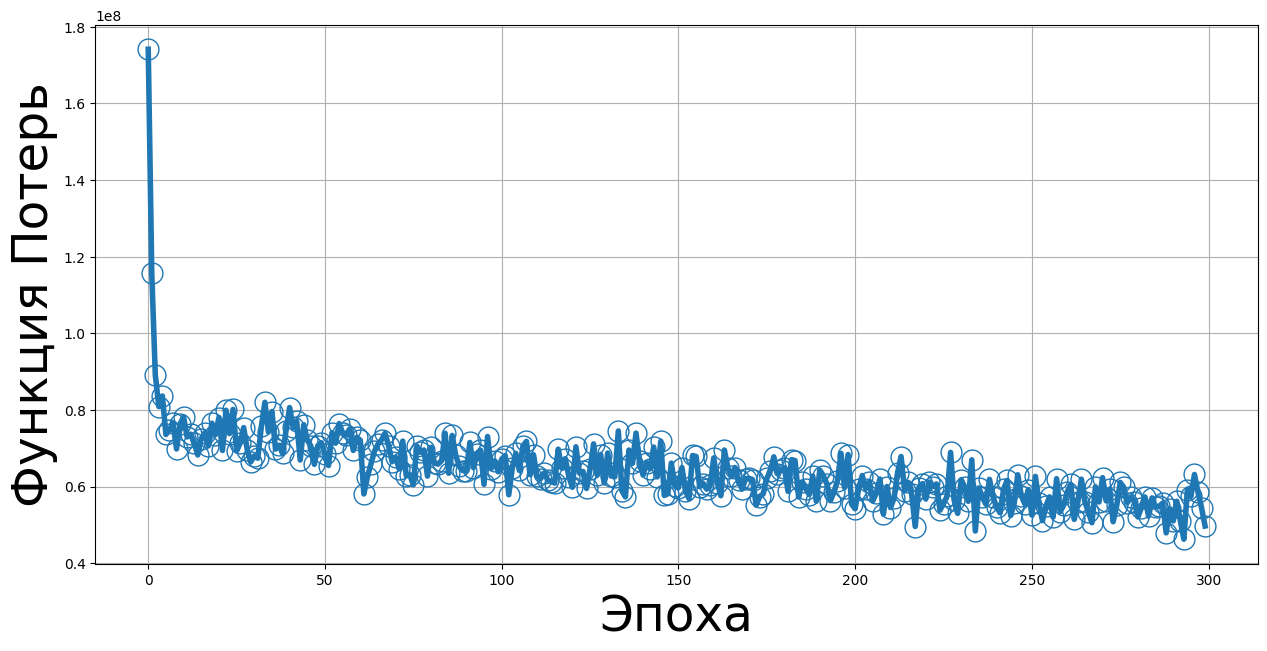

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit_SGD(X_train, y_train, weights, lr=0.7,  epochs=300)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost)

print(r2_score(weights, X_test, y_test))

### Создание класса Линейной регрессии

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если нету веса и смещения
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            # складываем их в один массив
                self.weights = np.append(self.bias,self.weights)

    def forward(self, X):
        return self.weights.dot(X.T)

    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    def update(self):
        return self.weights - self.lr*self.grad

    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            # совмещаем в один массив, если этого не было сделано
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

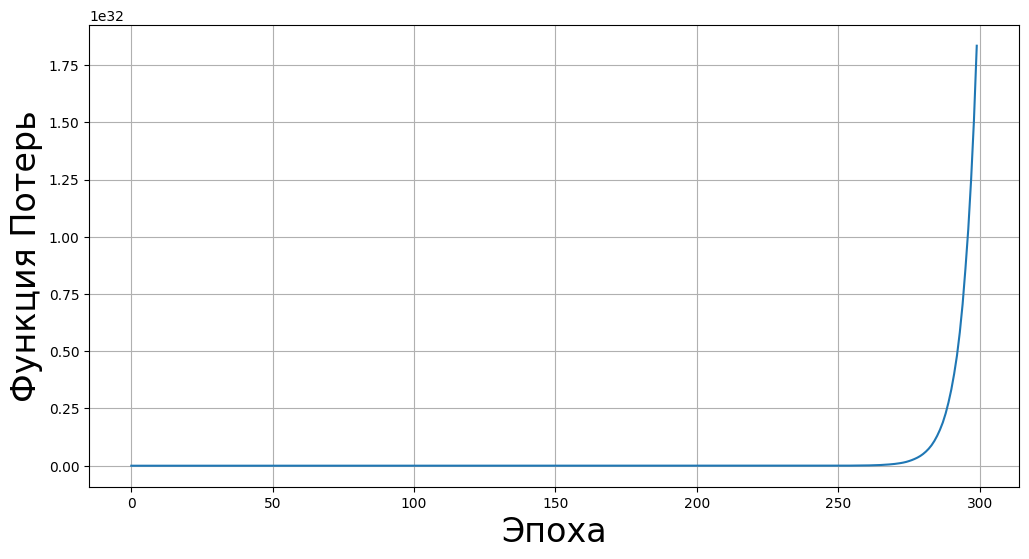

train R2: -2630859449949656788762624.0000; test R2: -2575625186478302880071680.0000


In [ ]:
reg = LinearRegression(learning_rate=0.5, epochs=300, batch_size=3000)
reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

### Функция определения весов

In [ ]:
def show_weights(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

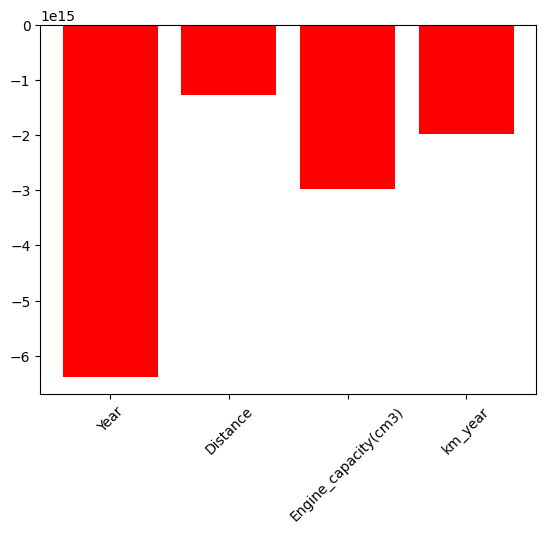

In [ ]:
# веса
w, b = reg.get_w_and_b()

show_weights(w, features_names)

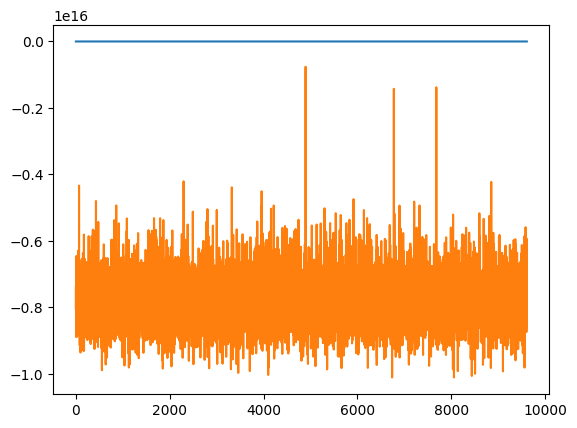

In [ ]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [ ]:
np.sum(np.abs(w))

1.2599651611166754e+16

# Класс регуляризации

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)

## Тестирование регрессии с регуляризацией

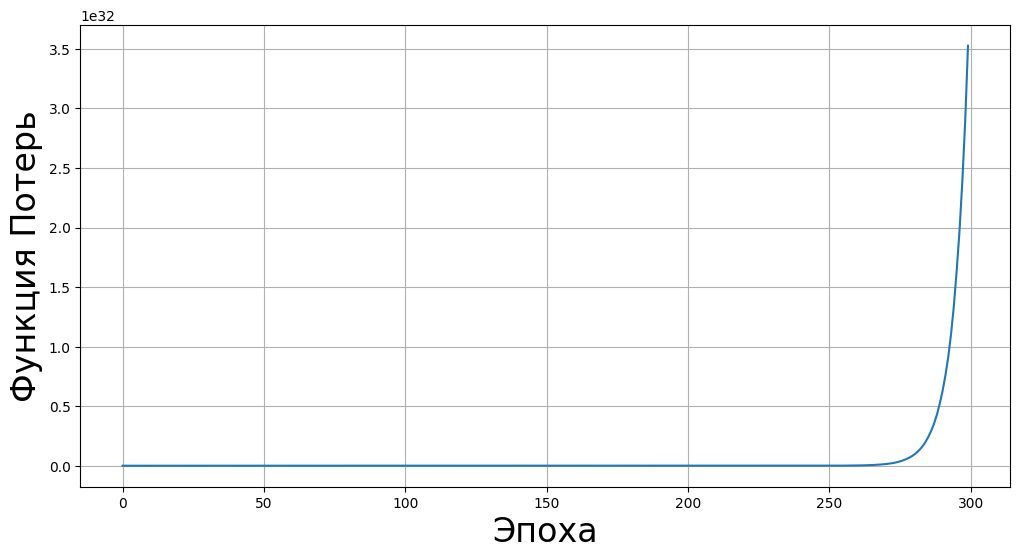

train R2: -5067109871533067486625792.0000; test R2: -4960734621588119497998336.0000


In [ ]:
reg = RidgeRegression(learning_rate=0.5,epochs=300,batch_size=3000, l2_penalty = 0.001)
reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

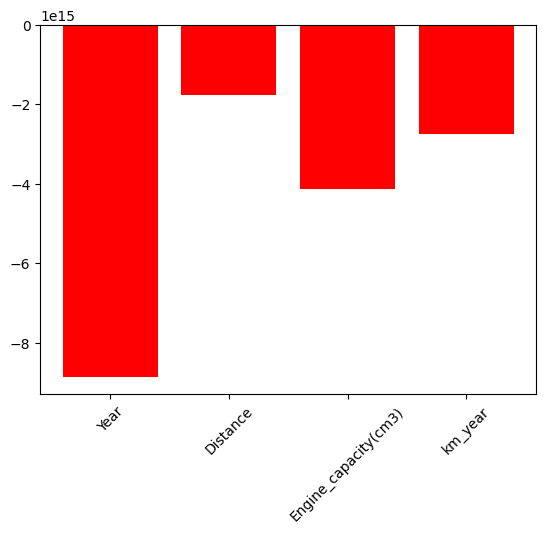

In [ ]:
# веса
w, b = reg.get_w_and_b()

show_weights(w, features_names)

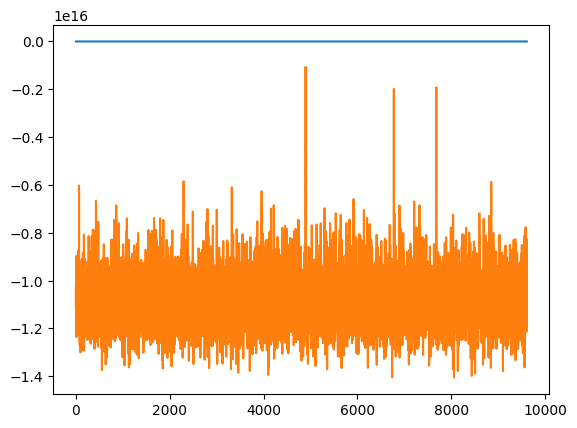

In [ ]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [ ]:
np.sum(np.abs(w))

1.7495453932070352e+16

## Оценка модели

In [ ]:
# среднеквадратичная ошибка
mean_square_error(w, X_test, y_test)

1.1256757275884037e+36

In [ ]:
# cредняя абсолютная ошибка
mean_absolute_error(w, X_test, y_test)

1.0356129188269874e+20

In [ ]:
# коэффицент детерминации
r2_score(w, X_test, y_test)

-1.3530297851669826e+24

# Различные типы предварительной обработки

## Нормализация

### Считывание нормализированных данных

In [ ]:
df = pd.read_csv('data/cars_moldova_normalisation.csv', delimiter = ',')

df

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,Toyota,Prius,0.366932,Hatchback,0.126972,-0.083235,Hybrid,Automatic,-0.169407,11,17727.272727,Middle mileage,Rare_Cheap
1,1,Renault,Grand Scenic,0.761088,Universal,-0.491797,-0.614249,Diesel,Manual,-0.082759,8,16875.000000,Middle mileage,Rare_Expensive
2,2,Renault,Laguna,0.498318,Universal,-0.749617,-0.614249,Diesel,Manual,-0.299379,10,11000.000000,Middle mileage,Average rarity
3,3,Opel,Astra,-0.289993,Universal,0.178536,-0.437244,Metan/Propan,Manual,-0.564738,16,12500.000000,Middle mileage,Average rarity
4,4,Mercedes,Vito,-1.078304,Microvan,1.209817,0.624784,Diesel,Manual,-0.630807,22,13636.363636,Middle mileage,Average rarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,Volkswagen,Passat,1.023858,Sedan,-0.976499,-0.083235,Petrol,Automatic,0.236756,6,14666.666667,Middle mileage,Average rarity
32028,32028,Land Rover,Freelander,-0.815533,Crossover,0.436356,-0.083235,Metan/Propan,Manual,-0.532245,20,11250.000000,Middle mileage,Rare_Cheap
32029,32029,Dacia,Logan Mcv,0.892473,Universal,-0.966187,-0.614249,Diesel,Manual,-0.250639,7,12714.285714,Middle mileage,Average rarity
32030,32030,Mazda,6,-0.289993,Combi,1.931714,0.270775,Diesel,Manual,-0.575569,16,23125.000000,High mileage,Rare_Cheap


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

### Разделение выборки

In [ ]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32032 entries, 0 to 32031
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32032 non-null  float64
 1   Distance              32032 non-null  float64
 2   Engine_capacity(cm3)  32032 non-null  float64
 3   Price(euro)           32032 non-null  float64
 4   km_year               32032 non-null  float64
dtypes: float64(5)
memory usage: 1.2 MB


,0,1,2,3
22417,0.760331,0.299930,0.576617,0.198397
22418,0.942149,0.164488,0.328358,0.410251
22419,0.710744,0.249925,0.303483,0.137163
22420,0.884298,0.293929,0.351741,0.390782
22421,0.876033,0.329933,0.318657,0.411323


### Линейная регрессия

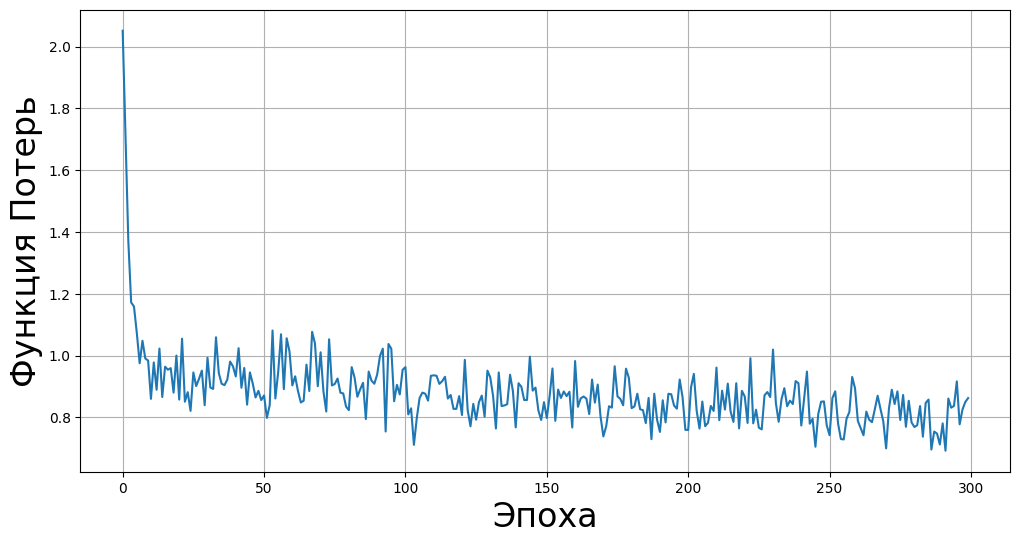

train R2: 0.2049; test R2: 0.2035


In [ ]:
reg = LinearRegression(learning_rate=0.05,epochs=300,batch_size=3000)
reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

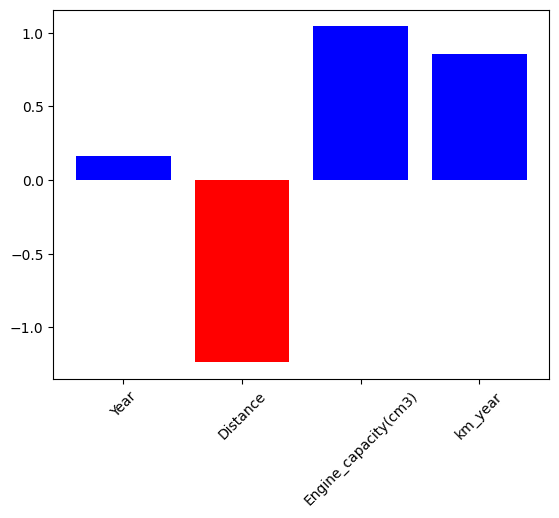

In [ ]:
# веса
w, b = reg.get_w_and_b()

show_weights(w, features_names)

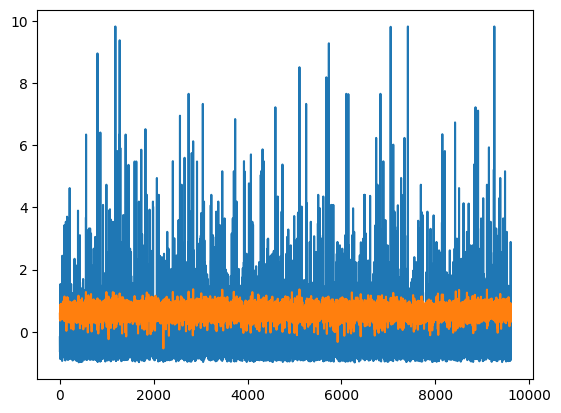

In [ ]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [ ]:
np.sum(np.abs(w))

3.3025226281428877

### Оценка модели

In [ ]:
# среднеквадратичная ошибка
mean_square_error(w, X_test, y_test)

11339.306691243637

In [ ]:
# cредняя абсолютная ошибка
mean_absolute_error(w, X_test, y_test)

8760.18834323619

In [ ]:
# коэффицент детерминации
r2_score(w, X_test, y_test)

-0.16183354569226216

__Нормализация данных улучшила результат работы. График потерь стал более гладким, потери уменьшились и веса__.

## Стандартизация

### Считывание стандартизированных данных

In [ ]:
df = pd.read_csv('data/cars_moldova_standardisation.csv', delimiter = ',')
df

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,Toyota,Prius,0.366932,Hatchback,0.126972,-0.083235,Hybrid,Automatic,-0.169407,11,17727.272727,Middle mileage,Rare_Cheap
1,1,Renault,Grand Scenic,0.761088,Universal,-0.491797,-0.614249,Diesel,Manual,-0.082759,8,16875.000000,Middle mileage,Rare_Expensive
2,2,Renault,Laguna,0.498318,Universal,-0.749617,-0.614249,Diesel,Manual,-0.299379,10,11000.000000,Middle mileage,Average rarity
3,3,Opel,Astra,-0.289993,Universal,0.178536,-0.437244,Metan/Propan,Manual,-0.564738,16,12500.000000,Middle mileage,Average rarity
4,4,Mercedes,Vito,-1.078304,Microvan,1.209817,0.624784,Diesel,Manual,-0.630807,22,13636.363636,Middle mileage,Average rarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,Volkswagen,Passat,1.023858,Sedan,-0.976499,-0.083235,Petrol,Automatic,0.236756,6,14666.666667,Middle mileage,Average rarity
32028,32028,Land Rover,Freelander,-0.815533,Crossover,0.436356,-0.083235,Metan/Propan,Manual,-0.532245,20,11250.000000,Middle mileage,Rare_Cheap
32029,32029,Dacia,Logan Mcv,0.892473,Universal,-0.966187,-0.614249,Diesel,Manual,-0.250639,7,12714.285714,Middle mileage,Average rarity
32030,32030,Mazda,6,-0.289993,Combi,1.931714,0.270775,Diesel,Manual,-0.575569,16,23125.000000,High mileage,Rare_Cheap


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

### Разделение выборки

In [ ]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values # x = все параметры кроме Price, y = Price

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32032 entries, 0 to 32031
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32032 non-null  float64
 1   Distance              32032 non-null  float64
 2   Engine_capacity(cm3)  32032 non-null  float64
 3   Price(euro)           32032 non-null  float64
 4   km_year               32032 non-null  float64
dtypes: float64(5)
memory usage: 1.2 MB


,0,1,2,3
22417,0.760331,0.299930,0.576617,0.198397
22418,0.942149,0.164488,0.328358,0.410251
22419,0.710744,0.249925,0.303483,0.137163
22420,0.884298,0.293929,0.351741,0.390782
22421,0.876033,0.329933,0.318657,0.411323


### Линейная регрессия

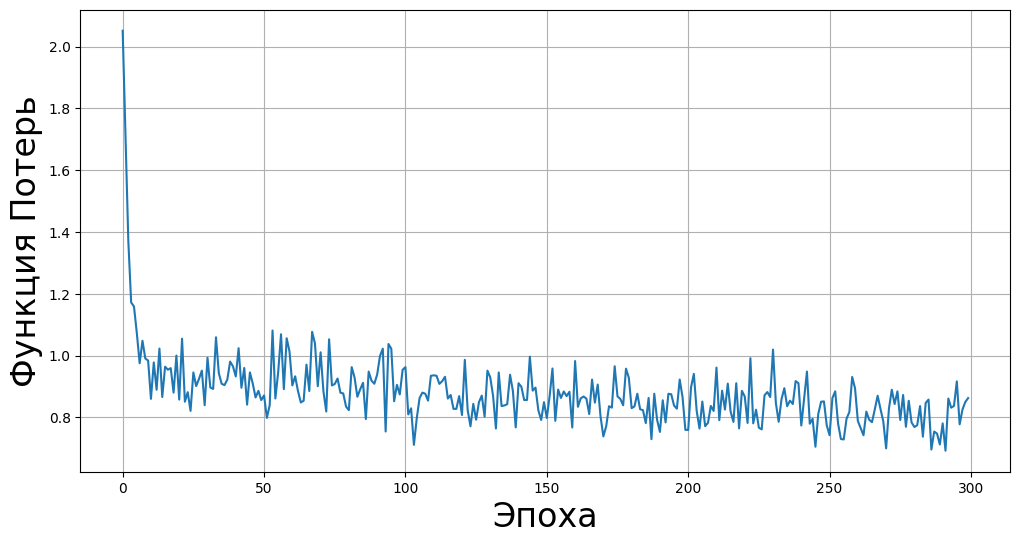

train R2: 0.2049; test R2: 0.2035


In [ ]:
reg = LinearRegression(learning_rate=0.05,epochs=300,batch_size=3000)
reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

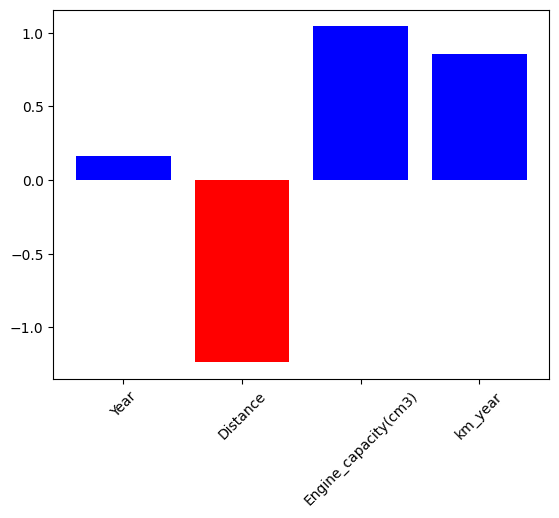

In [ ]:
# веса
w, b = reg.get_w_and_b()

show_weights(w, features_names)

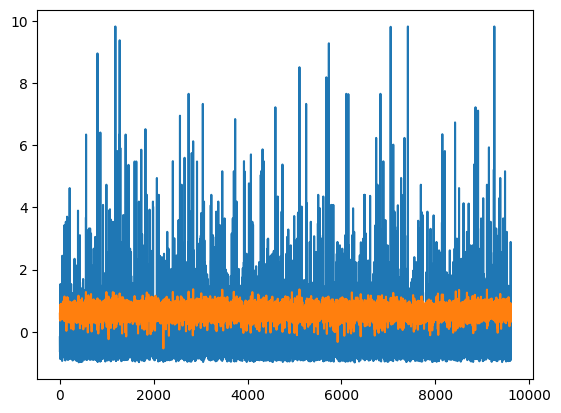

In [ ]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [ ]:
np.sum(np.abs(w))

3.3025226281428877

### Оценка модели

In [ ]:
# среднеквадратичная ошибка
mean_square_error(w, X_test, y_test)

11339.306691243637

In [ ]:
# cредняя абсолютная ошибка
mean_absolute_error(w, X_test, y_test)

8760.18834323619

In [ ]:
# коэффицент детерминации
r2_score(w, X_test, y_test)

-0.16183354569226216

__При применении стандартизации функция потерь неровная и она уменьшила веса. Нормализация была эффективнее__.

## One-hot encoding

### Считываем данные

In [ ]:
df_dum = pd.read_csv('data/cars_moldova_ohe.csv', delimiter = ',')
df_dum

,Unnamed: 0,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Make_ARO,Make_Abarth,Make_Acura,...,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,Distance_category_High mileage,Distance_category_Middle mileage,Rarity_Price_Average rarity,Rarity_Price_Rare_Cheap,Rarity_Price_Rare_Expensive
0,0,2011,195000.0,1800.0,7750.0,11,17727.272727,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,2014,135000.0,1500.0,8550.0,8,16875.000000,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2,2012,110000.0,1500.0,6550.0,10,11000.000000,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,3,2006,200000.0,1600.0,4100.0,16,12500.000000,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,4,2000,300000.0,2200.0,3490.0,22,13636.363636,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,2016,88000.0,1800.0,11500.0,6,14666.666667,0,0,0,...,0,1,0,1,0,0,1,1,0,0
32028,32028,2002,225000.0,1800.0,4400.0,20,11250.000000,0,0,0,...,1,0,0,0,1,0,1,0,1,0
32029,32029,2015,89000.0,1500.0,7000.0,7,12714.285714,0,0,0,...,0,0,0,0,1,0,1,1,0,0
32030,32030,2006,370000.0,2000.0,4000.0,16,23125.000000,0,0,0,...,0,0,0,0,1,1,0,0,1,0


### Разделяем выборку

In [ ]:
DF_norm  = df_num.copy()
Xmin = df_num[num_columns].min()
Xmax = df_num[num_columns].max()

DF_norm[num_columns] = (df_num[num_columns]- Xmin)/( Xmax - Xmin)
DF_norm.head()

,Year,Distance,Engine_capacity(cm3),Price(euro),km_year
0,0.917355,0.194919,0.402985,0.075651,0.353252
1,0.942149,0.134913,0.328358,0.083667,0.336172
2,0.925620,0.109911,0.328358,0.063627,0.218437
3,0.876033,0.199920,0.353234,0.039078,0.248497
4,0.826446,0.299930,0.502488,0.032966,0.271270


In [ ]:
df_dum['Year'] = DF_norm['Year']
df_dum['Distance'] = DF_norm['Distance']
df_dum['Engine_capacity(cm3)'] = DF_norm['Engine_capacity(cm3)']
df_dum['Price(euro)'] = DF_norm['Price(euro)']
#df_dum['km_year'] = DF_norm['km_year']
df_dum

,Unnamed: 0,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Make_ARO,Make_Abarth,Make_Acura,...,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,Distance_category_High mileage,Distance_category_Middle mileage,Rarity_Price_Average rarity,Rarity_Price_Rare_Cheap,Rarity_Price_Rare_Expensive
0,0,0.917355,0.194919,0.402985,0.075651,11,17727.272727,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,0.942149,0.134913,0.328358,0.083667,8,16875.000000,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2,0.925620,0.109911,0.328358,0.063627,10,11000.000000,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,3,0.876033,0.199920,0.353234,0.039078,16,12500.000000,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,4,0.826446,0.299930,0.502488,0.032966,22,13636.363636,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,0.958678,0.087909,0.402985,0.113226,6,14666.666667,0,0,0,...,0,1,0,1,0,0,1,1,0,0
32028,32028,0.842975,0.224922,0.402985,0.042084,20,11250.000000,0,0,0,...,1,0,0,0,1,0,1,0,1,0
32029,32029,0.950413,0.088909,0.328358,0.068136,7,12714.285714,0,0,0,...,0,0,0,0,1,0,1,1,0,0
32030,32030,0.876033,0.369937,0.452736,0.038076,16,23125.000000,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [ ]:
X,y = df_dum.drop(columns = ['Price(euro)']).values,df_dum['Price(euro)'].values

features_names = df_dum.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,871,872,873,874,875,876,877,878,879,880
22417,0.930411,0.760331,0.299930,0.576617,0.239669,0.198397,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
22418,0.168274,0.942149,0.164488,0.328358,0.057851,0.410251,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
22419,0.026849,0.710744,0.249925,0.303483,0.289256,0.137163,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
22420,0.493116,0.884298,0.293929,0.351741,0.115702,0.390782,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
22421,0.738472,0.876033,0.329933,0.318657,0.123967,0.411323,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


### Линейная регрессия

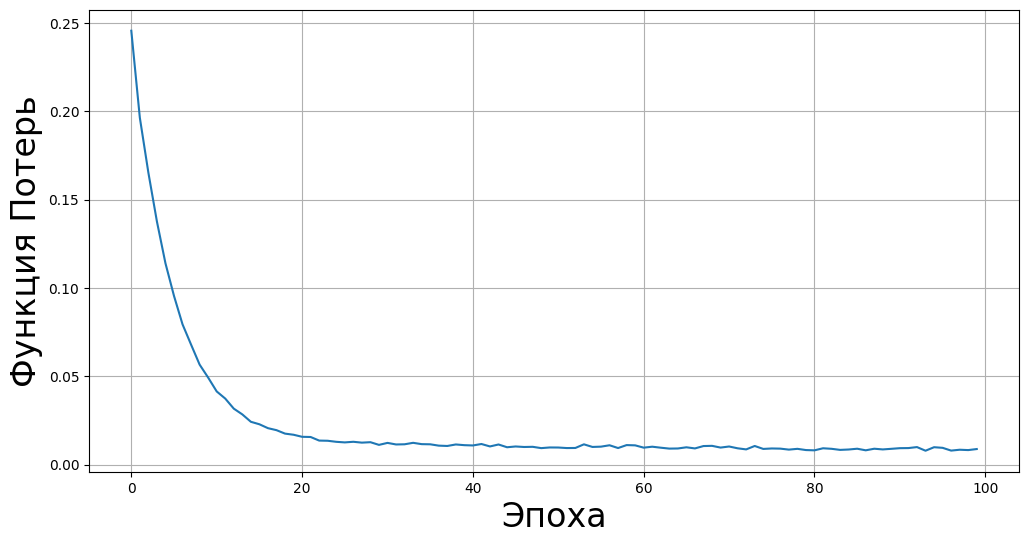

train R2: 0.0062; test R2: 0.0025


In [ ]:
reg = LinearRegression(learning_rate=0.01,epochs=100,batch_size=3000)
reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

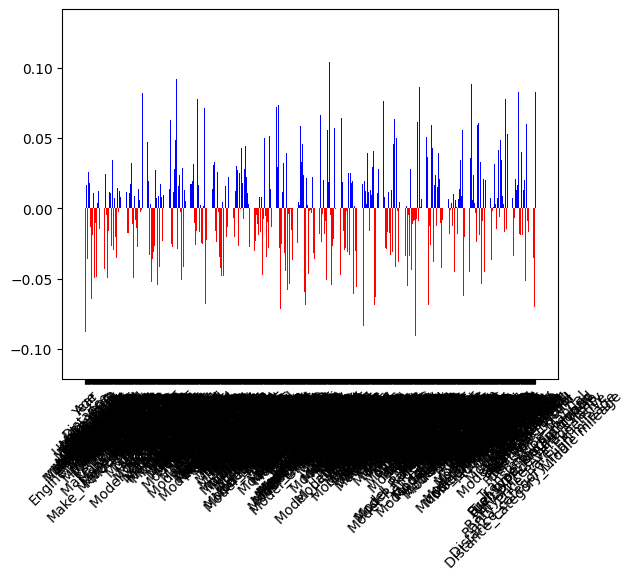

In [ ]:
# веса
w, b = reg.get_w_and_b()

show_weights(w, features_names)

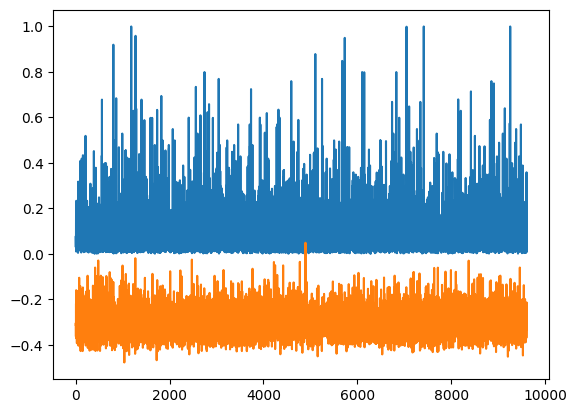

In [ ]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [ ]:
np.sum(np.abs(w))

23.373638009537924

### Оценка модели

In [ ]:
# среднеквадратичная ошибка
mean_square_error(w, X_test, y_test)

1576.580616782824

In [ ]:
# cредняя абсолютная ошибка
mean_absolute_error(w, X_test, y_test)

3788.231280284275

In [ ]:
# коэффицент детерминации
r2_score(w, X_test, y_test)

-17.874320300794388

__Анализ весов затруднился при one-hot кодировании из-за большого количества столбцов. Добавление категориальных уменьшило показатели train R2 и test R2__.

# Вывод

## График весов из самой точной модели

![](normalisation.png)

__На колонке Distance веса отрицательные и из этого можно сделать вывод, что цена больше на автомобили с маленьким пробегом__.

<AxesSubplot: xlabel='Distance', ylabel='Price(euro)'>

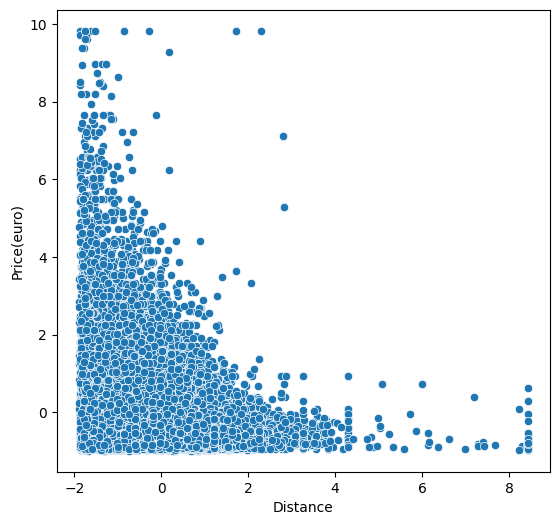

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Distance',y='Price(euro)',data=df,ax=ax)

__Исходя из анализа весов - можно сделать вывод, что Engine_capacity обладает самым большим весом. Следующим важным параметром является мощность двигателя. Год производства и удельный пробег менее важные параметры__.